In [59]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
from sklearn import preprocessing
import crepe
from scipy.io import wavfile
plt.rcParams['figure.figsize']=[25,10]
plt.rcParams.update({'font.size':8})


In [2]:
base='./Alap/'

In [3]:
a1=base+"alap1.wav"
a2=base+"alap2.wav"
a3=base+"alap3.wav"
a4=base+"alap4.wav"
a5=base+"alap5.wav"
a6=base+"alap6.wav"
a7=base+"alap7.wav"
a8=base+"alap8.wav"
a9=base+"alap9.wav"
a10=base+"alap10.wav"
a11=base+"alap11.wav"
a12=base+"alap12.wav"

In [4]:
voice1, sr = librosa.load(base+"alap1.wav")
voice2, _ = librosa.load(base+"alap2.wav")
voice3, _ = librosa.load(base+"alap3.wav")
voice4, _ = librosa.load(base+"alap4.wav")
voice5, _ = librosa.load(base+"alap5.wav")
voice6, _ = librosa.load(base+"alap6.wav")
voice7, _ = librosa.load(base+"alap7.wav")
voice8, _ = librosa.load(base+"alap8.wav")
voice9, _ = librosa.load(base+"alap9.wav")
voice10, _ = librosa.load(base+"alap10.wav")
voice11, _ = librosa.load(base+"alap11.wav")
voice12, _ = librosa.load(base+"alap12.wav")

In [5]:
def limitFreq(freq,size):
    for i,j in enumerate(freq):
        if j>size:
            return i 
            
def remove_till_limit(Xaxis,limit,maxBins):
    newX=[]
    for i in Xaxis[:maxBins]:
        if i<limit:
            newX.append(0)
        else:
            newX.append(i)
    return newX

def getFundamental(Xaxis,bins):
    for i,j in enumerate(Xaxis[1:bins]):
        if j>0:
            return i
        
def pitchEstimator(path):
    sr, audio = wavfile.read(path)
    time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True,step_size=100)
    lis=[]
    for i,j in enumerate(confidence): 
        if j > 0.92:
            lis.append(i)
    val=[frequency[i] for i in lis]
    return sum(val)/len(val)


def getIndxTill(end,freq,indx,gap):
    for i in range(indx,len(freq)):
        max=end*gap
        if freq[i]>max:
            indx=i
            return indx
        
def getMaxPow(start,end,Yaxis):
    if sum(Yaxis[start:end])!=0:
        return max(Yaxis[start:end])
    else:
        return 0

In [25]:
def findCoordinates(path,voice,i=0):
    X = np.fft.fft(voice)
    X_mag = np.absolute(X)
    power_spectrum = np.square(X_mag)
    f = np.linspace(0, sr, len(power_spectrum))
    f_bins=limitFreq(f,2000)
    
    newX_mag=remove_till_limit(power_spectrum,10000,f_bins) 
    pitch=round(pitchEstimator(path))
    Harmonics=[]
    l=[1]
    totalSplit=int(round(2000/pitch))
    for i in range(totalSplit):
        index=getIndxTill(pitch+10,f,l[i],i+1) 
        l.append(index)
        Harmonics.append(getMaxPow(l[i],l[i+1],newX_mag[:f_bins]))
    Harmonics = [i for i in Harmonics if i != 0]
    print(Harmonics) 

    if len(Harmonics)>5:
        midBand = sum(Harmonics[1:4])
        highBand = sum(Harmonics[4:])
    else:
        midBand = sum(Harmonics[1:3])
        highBand = sum(Harmonics[3:])
        
    return [midBand,highBand]

In [53]:
def plot_power_spectrum(path,voice,i): 
    X = np.fft.fft(voice)
    X_mag = np.absolute(X)
    power_spectrum = np.square(X_mag)
    f = np.linspace(0,sr, len(power_spectrum))
    f_bins=limitFreq(f,2000)
    
    pitch=round(pitchEstimator(path))
    print(f"Fundamental Frequency(Pitch) is {pitch} Hz")
    plt.subplot(2,6,i)
    plt.plot(f[1:f_bins], power_spectrum[1:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.title('Power Spectrum ' + f"Pitch = {pitch} Hz")

2/2 [==============================] - 1s 306ms/step
Fundamental Frequency(Pitch) is 139 Hz
2/2 [==============================] - 1s 490ms/step
Fundamental Frequency(Pitch) is 148 Hz
2/2 [==============================] - 1s 419ms/step
Fundamental Frequency(Pitch) is 175 Hz
2/2 [==============================] - 1s 495ms/step
Fundamental Frequency(Pitch) is 184 Hz
2/2 [==============================] - 1s 356ms/step
Fundamental Frequency(Pitch) is 207 Hz
2/2 [==============================] - 1s 376ms/step
Fundamental Frequency(Pitch) is 217 Hz
2/2 [==============================] - 1s 366ms/step
Fundamental Frequency(Pitch) is 262 Hz
2/2 [==============================] - 1s 317ms/step
Fundamental Frequency(Pitch) is 275 Hz
2/2 [==============================] - 1s 244ms/step
Fundamental Frequency(Pitch) is 289 Hz
2/2 [==============================] - 1s 228ms/step
Fundamental Frequency(Pitch) is 345 Hz
2/2 [==============================] - 1s 259ms/step
Fundamental Frequency(Pitch

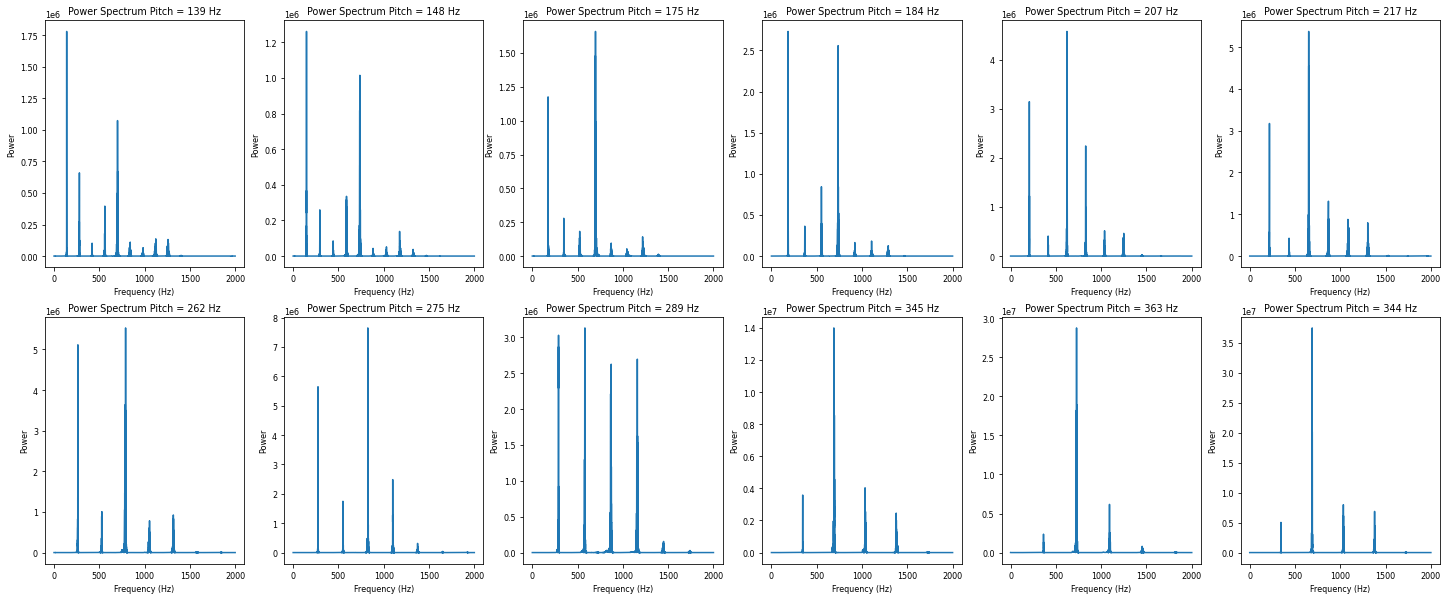

In [60]:
plot_power_spectrum(a1,voice1,1)
plot_power_spectrum(a2,voice2,2)
plot_power_spectrum(a3,voice3,3)
plot_power_spectrum(a4,voice4,4)
plot_power_spectrum(a5,voice5,5)
plot_power_spectrum(a6,voice6,6)
plot_power_spectrum(a7,voice7,7)
plot_power_spectrum(a8,voice8,8)
plot_power_spectrum(a9,voice9,9)
plot_power_spectrum(a10,voice10,10)
plot_power_spectrum(a11,voice11,11)
plot_power_spectrum(a12,voice12,12)

In [28]:
coordinates = []
coordinates.append(findCoordinates(a1,voice1,1))
coordinates.append(findCoordinates(a2,voice2,2))
coordinates.append(findCoordinates(a3,voice3,3))
coordinates.append(findCoordinates(a4,voice4,4))
coordinates.append(findCoordinates(a5,voice5,5))
coordinates.append(findCoordinates(a6,voice6,6))
coordinates.append(findCoordinates(a7,voice7,7))
coordinates.append(findCoordinates(a8,voice8,8))
coordinates.append(findCoordinates(a9,voice9,9))
coordinates.append(findCoordinates(a10,voice10,10))
coordinates.append(findCoordinates(a11,voice11,11))
coordinates.append(findCoordinates(a12,voice12,12))

2/2 [==============================] - 1s 390ms/step
[1780894.851049973, 659547.3812550107, 101860.94816857947, 395785.09614056116, 1074063.9075481428, 110498.13689748544, 66386.60601599705, 136424.5188047195, 131285.65511382007]
2/2 [==============================] - 1s 393ms/step
[1261368.4964346455, 259247.30555725034, 84925.09147529255, 335351.15661878575, 1014850.357904243, 42978.180868519245, 51627.42505635656, 138265.00956456398, 37359.92104644476]
2/2 [==============================] - 1s 404ms/step
[1175421.3165377292, 278884.26931906614, 182507.65597341055, 1659008.5692555478, 95599.37243478214, 53416.385342340036, 141971.38780503557, 13713.418282707746]
2/2 [==============================] - 1s 441ms/step
[2731142.7118812525, 362888.32408112264, 842945.0088740574, 2558650.3432440427, 164031.60795087027, 182400.38004686756, 126284.62157464835]
2/2 [==============================] - 1s 451ms/step
[3144241.2239884743, 407221.0459568813, 4575857.007756243, 2242588.7724524857, 51

In [29]:
coordinates

[[1157193.4255641513, 1518658.8243801647],
 [679523.5536513287, 1285080.8944401275],
 [2120400.4945480246, 304700.5638648655],
 [3764483.676199223, 472716.6095723862],
 [7225666.826165611, 1005116.9970910508],
 [7110635.199944903, 1687406.5436359693],
 [7318854.733625193, 939842.5227458158],
 [11875432.804912353, 363635.714032348],
 [8451719.456626326, 183996.40055930096],
 [18030013.3829215, 2514591.323700252],
 [34940715.22851851, 874717.4614407511],
 [45496593.94184518, 6997520.941515036]]

In [30]:
xCoord=[]
yCoord=[]
for i in coordinates:
    xCoord.append(i[0])
    yCoord.append(i[1])

In [31]:
import numpy as np

In [32]:
xNorm=[]
xMax=max(xCoord)
xMin=min(xCoord)
for i in xCoord:
    xNorm.append((i-xMin)/(xMax-xMin))

In [33]:
xNorm

[0.010658212769718544,
 0.0,
 0.03215018135759864,
 0.06883448864075159,
 0.14606361406074259,
 0.14349692183333163,
 0.14814290899573976,
 0.24981350084432022,
 0.17342043635726853,
 0.38714020526073484,
 0.7644674535418227,
 1.0]

In [139]:
data = np.array(scaled_x)
x, y = data.T
n=['alap1','alap2','alap3','alap4','alap5','alap6','alap7','alap8','alap9','alap10','alap11','alap12']

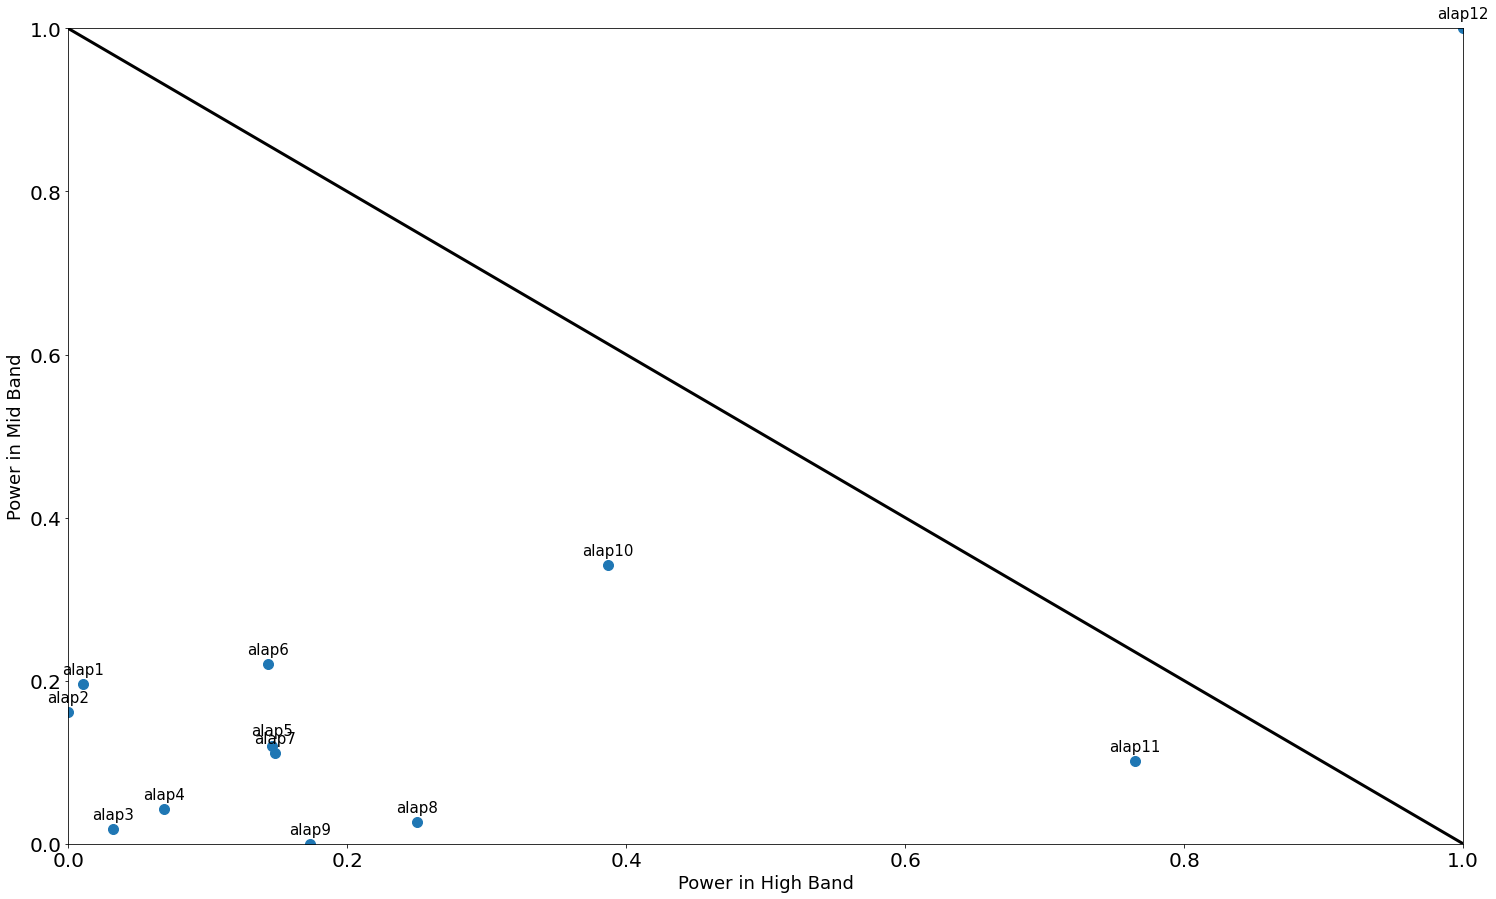

In [141]:
# fig, ax = plt.subplots()
plt.figure(figsize=(25, 15))  
plt.rcParams['font.size'] = '15' 

plt.scatter(x, y,s=100)
plt.xlabel('Power in High Band',fontsize=18)
plt.ylabel('Power in Mid Band',fontsize=18)
plt.plot([1,0],[0,1], 'k-',linewidth=3)
plt.xlim(0,1)
plt.ylim(0,1)
for i,j,k in zip(x,y,n):
    label = k
    plt.annotate(label, # this is the text
                 (i,j), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',) 
    

 

plt.show()